Questions:1.Load the data from “cereal.csv” and plot histograms of sugar and vitamin content across different cereals.[Hint: Extract values of a specific column using their labels and use hist method of pyplot]


2. The names of the manufactures are coded using alphabets, create a new column with their fullname using the below mapping.'N': 'Nabisco','Q': 'Quaker Oats','K': 'Kelloggs','R': 'Raslston Purina','G': 'General Mills' ,'P' :'Post' ,'A':'American Home Foods Products'


Create a bar plot where each manufacturer is on the y axis and the height of the bars depict the number of cereals manufactured by them.[Hint: Try using countplot this time or bar method of pyplot]

3. Extract the rating as your target variable ‘y’ and all numerical parameters as your predictors ‘x’. Separate 25% of your data as test set.

4. Fit a linear regression module and measure the mean squared error on test dataset.[ Hint: Explore linear models and metrics section of sklearn documentation]



Context
If you like to eat cereal, do yourself a favor and avoid this dataset at all costs. After seeing these data it will never be the same for me to eat Fruity Pebbles again.

Content
Fields in the dataset:

Name: Name of cereal
mfr: Manufacturer of cereal
A = American Home Food Products;
G = General Mills
K = Kelloggs
N = Nabisco
P = Post
Q = Quaker Oats
R = Ralston Purina
type:
cold
hot
calories: calories per serving
protein: grams of protein
fat: grams of fat
sodium: milligrams of sodium
fiber: grams of dietary fiber
carbo: grams of complex carbohydrates
sugars: grams of sugars
potass: milligrams of potassium
vitamins: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended
shelf: display shelf (1, 2, or 3, counting from the floor)
weight: weight in ounces of one serving
cups: number of cups in one serving
rating: a rating of the cereals (Possibly from Consumer Reports?)
Acknowledgements
These datasets have been gathered and cleaned up by Petra Isenberg, Pierre Dragicevic and Yvonne Jansen. The original source can be found here

This dataset has been converted to CSV

Inspiration
Eat too much sugary cereal? Ruin your appetite with this dataset!

In [65]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns


https://www.kaggle.com/jeandsantos/breakfast-cereals-data-analysis-and-clustering/data



In [66]:
data=pd.read_csv("cereal.csv")

In [67]:
data.head(5)


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [68]:
data.shape

(77, 16)

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
name        77 non-null object
mfr         77 non-null object
type        77 non-null object
calories    77 non-null int64
protein     77 non-null int64
fat         77 non-null int64
sodium      77 non-null int64
fiber       77 non-null float64
carbo       77 non-null float64
sugars      77 non-null int64
potass      77 non-null int64
vitamins    77 non-null int64
shelf       77 non-null int64
weight      77 non-null float64
cups        77 non-null float64
rating      77 non-null float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [70]:
data['name'].unique

<bound method Series.unique of 0                     100% Bran
1             100% Natural Bran
2                      All-Bran
3     All-Bran with Extra Fiber
4                Almond Delight
                ...            
72                      Triples
73                         Trix
74                   Wheat Chex
75                     Wheaties
76          Wheaties Honey Gold
Name: name, Length: 77, dtype: object>

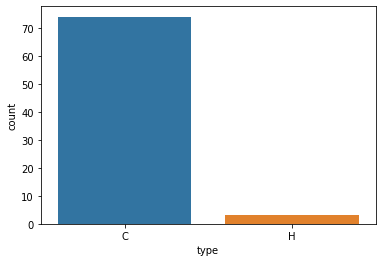

In [71]:
sns.countplot(data['type'],label="count")

(array([ 8.,  4., 13.,  6.,  7.,  9.,  9.,  5., 11.,  5.]),
 array([-1. ,  0.6,  2.2,  3.8,  5.4,  7. ,  8.6, 10.2, 11.8, 13.4, 15. ]),
 <a list of 10 Patch objects>)

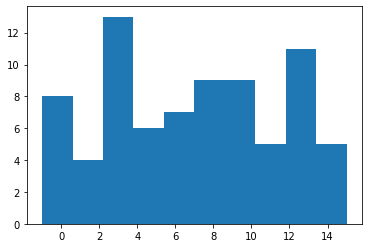

In [72]:
#histo=["type","sugars","vitamins"]
#data1=data[histo]
#data1=data1.query("type=='C'")
plt.hist(data['sugars'],align='mid')


In [73]:
plt.hist(data1['sugars'],label="C")

NameError: name 'data1' is not defined

(array([ 8.,  0., 63.,  0.,  0.,  0.,  0.,  0.,  0.,  6.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

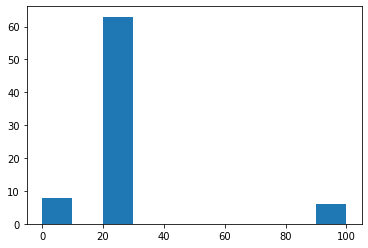

In [74]:
plt.hist(data['vitamins'],label="C")

In [75]:
data['mfr_names']=data['mfr']
data.head(5)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,mfr_names
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,N
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,Q
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,K
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,K
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,R


In [76]:
data['mfr_names']=data['mfr_names'].map({'N':'Nabisco','Q':'Quaker Oats','K':'Kelloggs','R':'Raslston Purina','G':'General Mills','P':'Post','A':'American Home Food Products'})

In [77]:
data.head(6)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,mfr_names
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,Nabisco
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,Quaker Oats
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,Kelloggs
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,Kelloggs
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,Raslston Purina
5,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.0,0.75,29.509541,General Mills


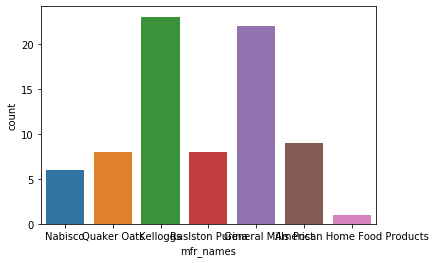

In [78]:
sns.countplot(data['mfr_names'],label="no_of_cereals")

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 17 columns):
name         77 non-null object
mfr          77 non-null object
type         77 non-null object
calories     77 non-null int64
protein      77 non-null int64
fat          77 non-null int64
sodium       77 non-null int64
fiber        77 non-null float64
carbo        77 non-null float64
sugars       77 non-null int64
potass       77 non-null int64
vitamins     77 non-null int64
shelf        77 non-null int64
weight       77 non-null float64
cups         77 non-null float64
rating       77 non-null float64
mfr_names    77 non-null object
dtypes: float64(5), int64(8), object(4)
memory usage: 10.4+ KB


In [103]:
y=data.iloc[:,15]
x=data.iloc[:,3:14]
#x.info()
#print(y)
x.shape
y.shape

(77,)

In [104]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)



In [106]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [109]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.9999999999999992

In [110]:
print(metrics.mean_squared_error(y_test,y_pred))


1.5033726379766615e-13
